# Solar Generation Data - Predictive Analysis

## Domain Proyek

Energi terbarukan menjadi alternatif yang banyak dipakai untuk menggantikan sumber energi konvensional, seperti minyak bumi dan batu bara. Keunggulan dari sumber energi ini, selain tidak akan habis, adalah rendahnya residu dari proses pembangkitan listrik. Residu yang dimaksud seperti gas rumah kaca dari pembakaran batu bara pada Pembangkit Listrik Tenaga Uap (PLTU), yang berbahaya bagi lingkungan dan dapat menyebabkan pemanasan global. Oleh karena itu, berbagai *stakeholder* terus berupaya meningkatkan porsi pemanfaatan sumber energi terbarukan dalam memenuhi kebutuhan energi.

Salah satu jenis energi terbarukan yang populer adalah energi surya. Energi ini memiliki kapasitas pembangkitan yang terus meningkat dari tahun ke tahun [1, 2]. Selain itu, implementasi energi surya, seperti dengan panel Photo-Voltaic (PV), mengalami penurunan biaya dari tahun ke tahun [3]. Penelitian dalam bidang pembangkitan energi surya, material panel PV, dan teknologi pengumpulan energi surya juga telah banyak dilakukan [4]. Hal ini menunjukkan potensi energi surya untuk mengurangi konsumsi energi dari sumber konvensional dan tidak ramah lingkungan.

Hal yang perlu diperhatikan adalah kapasitas energi yang dihasilkan energi surya belum bisa sepenuhnya menggantikan sumber energi konvensional. Oleh karena itu, ketika sebuah Pembangkit Listrik Tenaga Surya (PLTS) dihubungkan ke jaringan distribusi listrik (*grid*), energi yang diproduksi PLTS harus dapat disesuaikan dengan energi dari PLTU atau pembangkit lain. Apabila seluruh pembangkit memproduksi energi tanpa memperhatikan kondisi atau kapasitas jaringan, hal ini dapat membahayakan seluruh grid.

Di sinilah pentingnya model untuk memprediksi produksi energi surya pada PLTS. Apabila energi yang dihasilkan dapat diketahui *trend*-nya, pihak yang mengoperasikan grid dapat dengan mudah mencegah *overcapacity* atau *under-capacity*. Energi surya pada akhirnya dapat membantu memenuhi konsumsi energi tanpa menyebabkan kerusakan atau gangguan pada grid. Hal yang dibutuhkan adalah model prediksi pembangkitan energi listrik dari PLTS yang akurat. Di proyek ini, akan dibentuk model prediksi yang dapat dimanfaatkan untuk kepentingan tersebut dengan mengamati penelitian yang telah ada [5,6]. 
<br>
<br>

**Referensi:** <br>
[1] REN21, P.S., Renewables 2014: Global Status Report. 2014: Secretariat
Renewable Energy Policy Network for the 21st Century (REN21) Paris. <br>
[2] International Energy Agency, International Energy Statistics. 2014; Available
from: 〈http://www.eia.gov/cfapps/ipdbproject/IEDIndex3.cfm〉. <br>
[3] Price of crystaline silicon photovoltaic cells; 2012. Available from: 〈http://
www.economist.com/blogs/graphicdetail/2012/12/daily-chart-19〉 <br>
[4] Kannan, N., & Vakeesan, D. (2016). Solar energy for future world:-A review. Renewable and Sustainable Energy Reviews, 62, 1092-1105. <br>
[5] Sharma, N., Sharma, P., Irwin, D., & Shenoy, P. (2011, October). Predicting solar generation from weather forecasts using machine learning. In 2011 IEEE international conference on smart grid communications (SmartGridComm) (pp. 528-533). IEEE. <br>
[6] Yesilbudak, M., Çolak, M., & Bayindir, R. (2016, November). A review of data mining and solar power prediction. In 2016 IEEE International Conference on Renewable Energy Research and Applications (ICRERA) (pp. 1117-1121). IEEE.

## Business Understanding



### Problem Statement

Pembangkit Listrik Tenaga Surya menghasilkan energi secara fluktuatif dan tidak dapat dikendalikan. Setiap pembangkit yang dihubungkan ke jaringan distribusi listrik (*grid*) perlu diatur sedemikian rupa sehingga tidak menyebabkan gangguan/kerusakan. Oleh karena itu, energi dari PLTS harus dapat diprediksi agar membantu pengaturan PLTS ketika dihubungkan dengan grid



### Goals

Proyek ini bertujuan untuk menghasilkan model prediksi dari produksi energi PLTS dengan memanfaatkan data pengamatan cuaca.



### Solution Statement

Untuk memenuhi tujuan tersebut, akan diajukan empat model regresi:
1.   Support Vector Machine (SVM)
2.   Random Forest
3.   Adaptive Boosting
4.   Gradient Boosting

Masing-masing model akan dibandingkan kinerjanya dengan metrik R<sup>2</sup>.



## Data Understanding Part 1

Dataset yang akan digunakan adalah data dua PLTS di India selama 34 hari. Setiap PLTS menghasilkan data pembangkitan daya pada level inverter dan data pembacaan sensor pada array PV. Data ini dapat diunduh dari [Kaggle](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data?select=Plant_2_Generation_Data.csv).

In [1]:
# Import Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mount Gdrive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


### Dataset 1

Dataset pertama adalah data pembangkitan daya PLTS. Di sini, terdapat beberapa variabel:
* DATE_TIME: Waktu pengamatan dengan interval 15 menit;
* PLANT_ID: Nomor identitas PLTS;
* SOURCE_KEY: Kode identitas inverter;
* DC_POWER: jumlah daya DC yang dihasilkan inverter tiap 15 menit (kiloWatt);
* AC_POWER: jumlah daya AC yang dihasilkan inverter tiap 15 menit (kiloWatt);
* DAILY_YIELD: jumlah kumulatif energi yang dipanen inverter pada hari tersebut (kWh);
* TOTAL_YIELD: jumlah energi yang dipanen inverter hingga waktu tersebut (kWh)

In [3]:
# Load data
data1 = pd.read_csv("/content/gdrive/MyDrive/Training/Dicoding/Dataset/Plant_2_Generation_Data.csv")
data1.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
5  2020-05-15 00:00:00   4136001  LYwnQax7tkwH5Cb       0.0       0.0   
6  2020-05-15 00:00:00   4136001  LlT2YUhhzqhg5Sw       0.0       0.0   
7  2020-05-15 00:00:00   4136001  Mx2yZCDsyf6DPfv       0.0       0.0   
8  2020-05-15 00:00:00   4136001  NgDl19wMapZy17u       0.0       0.0   
9  2020-05-15 00:00:00   4136001  PeE6FRyGXUgsRhN       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07  
5  1872.500000  1.794959e+09  
6  1094.357143  2.825928e+08  
7  5692.200000  2.453646e+06  
8  1866.200000  1.115126e+08  
9   651.200000  1.348351e+09

In [4]:
data1.tail(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
67688  2020-06-17 23:45:00   4136001  V94E5Ben1TlhnDV       0.0       0.0   
67689  2020-06-17 23:45:00   4136001  WcxssY2VbP4hApt       0.0       0.0   
67690  2020-06-17 23:45:00   4136001  mqwcsP2rE7J0TFp       0.0       0.0   
67691  2020-06-17 23:45:00   4136001  oZ35aAeoifZaQzV       0.0       0.0   
67692  2020-06-17 23:45:00   4136001  oZZkBaNadn6DNKz       0.0       0.0   
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD   TOTAL_YIELD  
67688       4324.0  1.412293e+09  
67689       4331.0  1.819119e+08  
67690       4238.0  5.938150e+08  
67691       4467.0  1.660189e+09  
67692       4389.0  1.708288e+09  
67693       4157.0  5.207580e+05  
67694       3931.0  1.211314e+08  
67695       4322.0  2.427691e+06  
67696       4218.0  1.068964e+08  
67697       4316.0  2.093357e+08

**EDA**

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [6]:
data1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [7]:
data1[["PLANT_ID"]].value_counts()

PLANT_ID
4136001     67698
dtype: int64

In [8]:
data1[["DATE_TIME"]].value_counts()

DATE_TIME          
2020-05-15 00:00:00    22
2020-06-06 17:15:00    22
2020-06-06 14:45:00    22
2020-06-06 15:00:00    22
2020-06-06 15:15:00    22
                       ..
2020-05-20 08:15:00    12
2020-05-20 08:00:00    12
2020-05-20 07:45:00    12
2020-05-20 07:30:00    12
2020-05-20 06:30:00    12
Length: 3259, dtype: int64

In [9]:
data1.isnull().any()

DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

**Visualisasi**

In [10]:
num_columns = data1.columns.to_list()[3:]

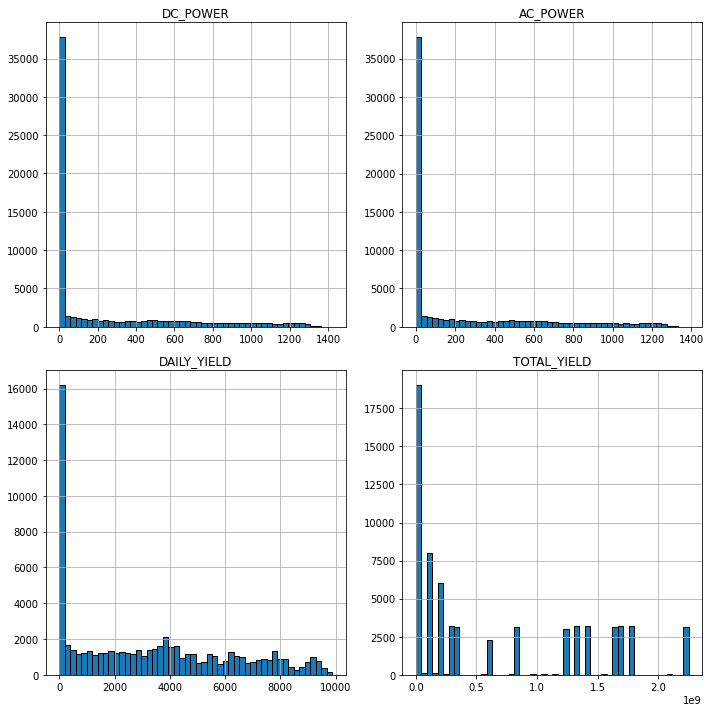

In [11]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns):
  plt.subplot(2,2,i+1)
  data1[column].hist(edgecolor='black', bins=50)
  plt.title("{}".format(column))

plt.tight_layout()
plt.show()

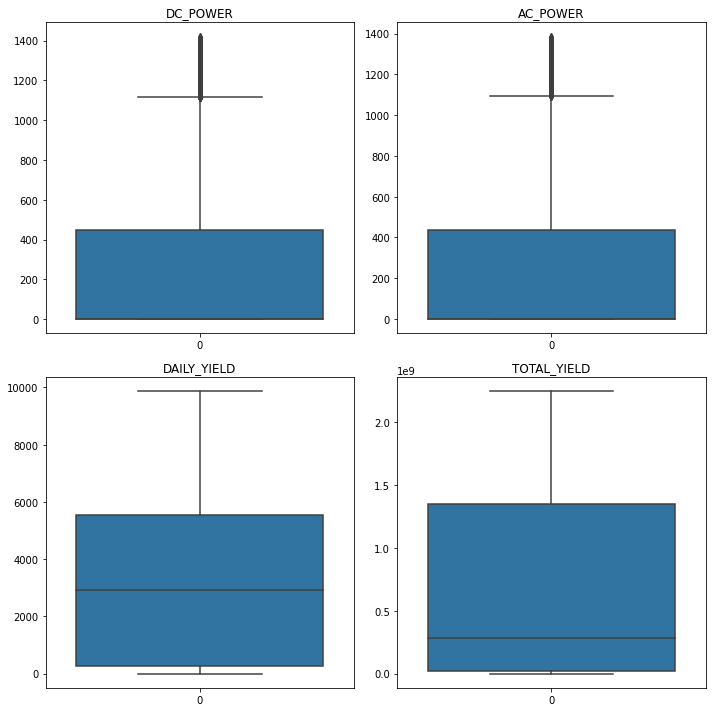

In [12]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=data1[column])
  plt.title("{}".format(column))

plt.tight_layout()
plt.show()

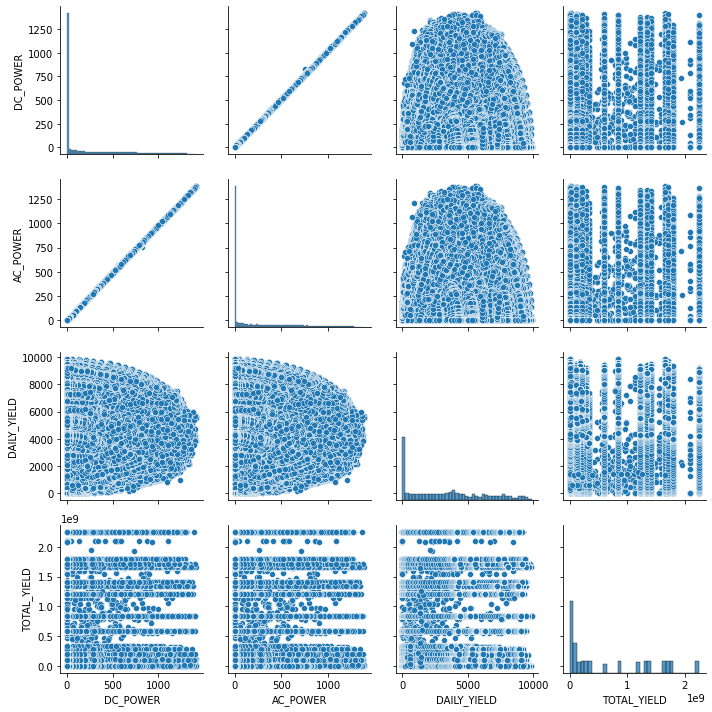

In [13]:
sns.pairplot(data=data1[num_columns])
plt.tight_layout()
plt.show()

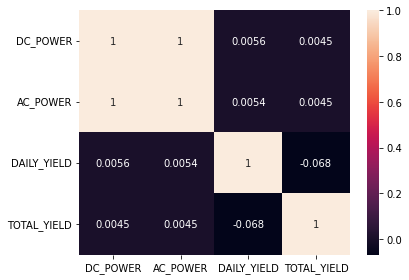

In [14]:
sns.heatmap(data=data1[num_columns].corr(), annot=True)
plt.tight_layout()
plt.show()

### Dataset 2

Dataset kedua adalah data pembacaan sensor di array PV PLTS. Di sini, terdapat beberapa variabel:
* DATE_TIME: Waktu pengamatan dengan interval 15 menit;
* PLANT_ID: Nomor identitas PLTS;
* SOURCE_KEY: Kode identitas sensor;
* AMBIENT_TEMPERATURE: suhu ambient PLTS (derajat Celcius);
* MODULE_TEMPERATURE: suhu module PV (derajat Celcius);
* IRRADIATION: jumlah iradiasi setiap 15 menit (W/m<sup>2</sup>)

In [15]:
# Load data
data2 = pd.read_csv("/content/gdrive/MyDrive/Training/Dicoding/Dataset/Plant_2_Weather_Sensor_Data.csv")
data2.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   
5  2020-05-15 01:15:00   4136001  iq8k7ZNt4Mwm3w0            26.512740   
6  2020-05-15 01:30:00   4136001  iq8k7ZNt4Mwm3w0            26.494339   
7  2020-05-15 01:45:00   4136001  iq8k7ZNt4Mwm3w0            26.420410   
8  2020-05-15 02:00:00   4136001  iq8k7ZNt4Mwm3w0            26.401946   
9  2020-05-15 02:15:00   4136001  iq8k7ZNt4Mwm3w0            26.226078   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0  
5           25.317970          0.0  
6           25.217193          0.0  
7           25.065062          0.0  
8           24.691469          0.0  
9           24.559481          0.0

In [16]:
data2.tail(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
3249  2020-06-17 21:30:00   4136001  iq8k7ZNt4Mwm3w0            23.899252   
3250  2020-06-17 21:45:00   4136001  iq8k7ZNt4Mwm3w0            23.883054   
3251  2020-06-17 22:00:00   4136001  iq8k7ZNt4Mwm3w0            23.767680   
3252  2020-06-17 22:15:00   4136001  iq8k7ZNt4Mwm3w0            23.656357   
3253  2020-06-17 22:30:00   4136001  iq8k7ZNt4Mwm3w0            23.628108   
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
3249           23.729646          0.0  
3250           23.689581          0.0  
3251           23.391407          0.0  
3252           23.123148          0.0  
3253           23.029210          0.0  
3254           22.856201          0.0  
3255           22.744190          0.0  
3256           22.492245          0.0  
3257           22.373909          0.0  
3258           22.535908          0.0

**EDA**

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [18]:
data2.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [19]:
data2[["PLANT_ID"]].value_counts()

PLANT_ID
4136001     3259
dtype: int64

In [20]:
data2[["DATE_TIME"]].value_counts()

DATE_TIME          
2020-05-15 00:00:00    1
2020-06-06 17:15:00    1
2020-06-06 14:45:00    1
2020-06-06 15:00:00    1
2020-06-06 15:15:00    1
                      ..
2020-05-26 08:45:00    1
2020-05-26 09:00:00    1
2020-05-26 09:15:00    1
2020-05-26 09:30:00    1
2020-06-17 23:45:00    1
Length: 3259, dtype: int64

In [21]:
data2.isnull().any()

DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

**Visualisasi**

In [22]:
num_columns2 = data2.columns.to_list()[3:]

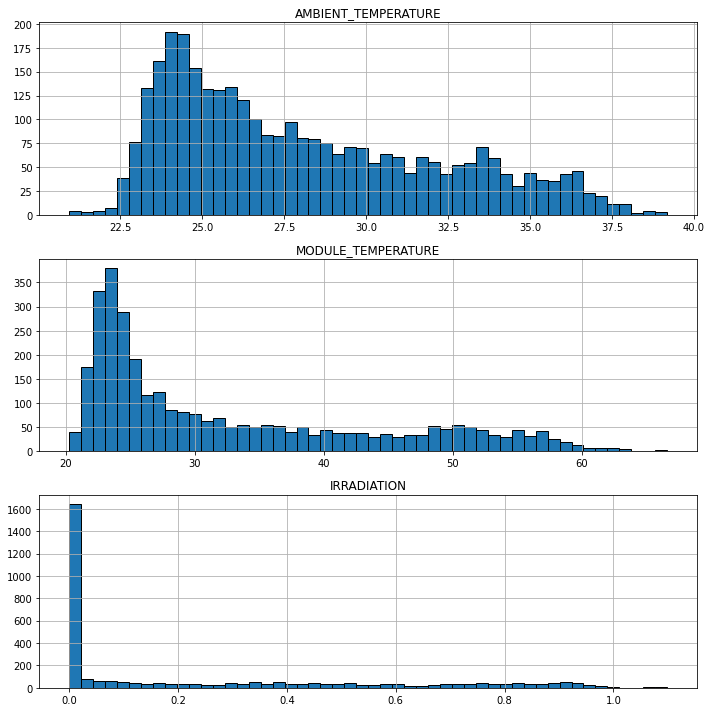

In [23]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns2):
  plt.subplot(3,1,i+1)
  data2[column].hist(edgecolor='black', bins = 50)
  plt.title("{}".format(column))

plt.tight_layout()
plt.show()

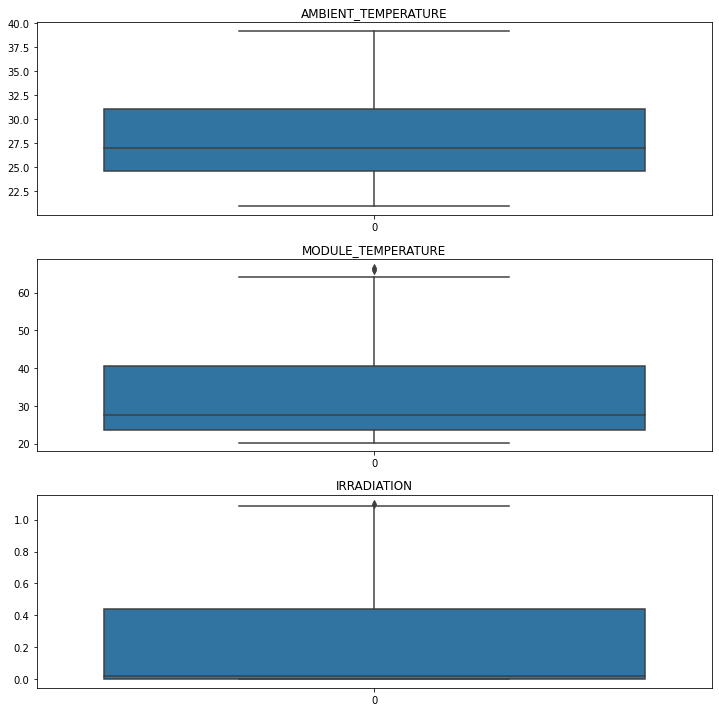

In [24]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns2):
  plt.subplot(3,1,i+1)
  sns.boxplot(data=data2[column])
  plt.title("{}".format(column))

plt.tight_layout()
plt.show()

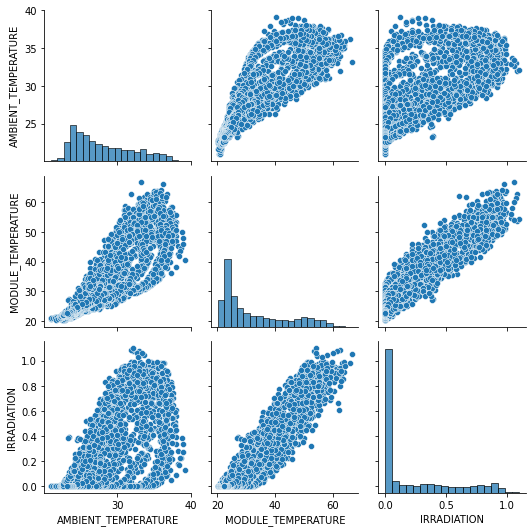

In [25]:
sns.pairplot(data=data2[num_columns2])
plt.tight_layout()
plt.show()

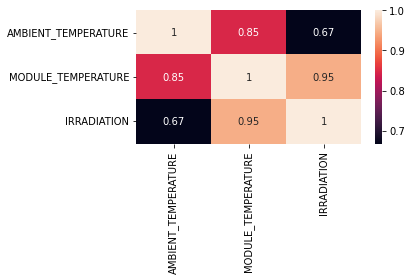

In [26]:
sns.heatmap(data=data2[num_columns2].corr(), annot=True)
plt.tight_layout()
plt.show()

## Data Understanding Part 2

### Filtering

Pada dua dataset yang digunakan, daat diketahui bahwa dataset diperoleh dari dua sensor berbeda, tetapi pada rentang waktu yang sama. Selain itu, pada Dataset 1, jumlah pembacaan sensor untuk satu waktu tertentu berjumlah lebih dari satu. Oleh karena itu, di sini, Dataset 1 akan dicari **nilai rata-rata (*mean*)** untuk satu waktu spesifik.

In [27]:
dc_power = []
ac_power = []
daily_yield = []
total_yield = []

for time in data1["DATE_TIME"].unique().tolist():
  dc_power.append(data1.loc[data1["DATE_TIME"] == time, ["DC_POWER"]].mean().to_list())
  ac_power.append(data1.loc[data1["DATE_TIME"] == time, ["AC_POWER"]].mean().to_list())
  daily_yield.append(data1.loc[data1["DATE_TIME"] == time, ["DAILY_YIELD"]].mean().to_list())
  total_yield.append(data1.loc[data1["DATE_TIME"] == time, ["TOTAL_YIELD"]].mean().to_list())

In [28]:
dc_power = np.array(dc_power)
dc_power.shape

(3259, 1)

In [29]:
ac_power = np.array(ac_power)
ac_power.shape

(3259, 1)

In [30]:
daily_yield = np.array(daily_yield)
daily_yield.shape

(3259, 1)

In [31]:
total_yield = np.array(total_yield)
total_yield.shape

(3259, 1)

### Gabungkan Data

Kedua dataset di atas kemudian dapat digabungkan untuk menghasilkan satu dataset baru. Hal ini untuk memudahkan pengolahan data lebih lanjut.

In [32]:
data2["DC_POWER"] = dc_power
data2["AC_POWER"] = ac_power
data2["DAILY_YIELD"] = daily_yield
data2["TOTAL_YIELD"] = total_yield

In [33]:
data2.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  DC_POWER  AC_POWER  DAILY_YIELD  \
0           25.060789          0.0       0.0       0.0  2222.724459   
1           24.421869          0.0       0.0       0.0  1290.954545   
2           24.427290          0.0       0.0       0.0  1290.954545   
3           24.420678          0.0       0.0       0.0  1290.954545   
4           25.088210          0.0       0.0       0.0  1205.272727   

    TOTAL_YIELD  
0  6.449816e+08  
1  6.449816e+08  
2  6.449816e+08  
3  6.449816e+08  
4  6.449816e+08

### Konversi Tipe Data

Pada pengecekan tipe data tiap kolom, data pada kolom DATE_TIME masih berupa object. Oleh karena itu, data pada kolom tersebut perlu dikonversi menjadi tipe data datetime. 

In [34]:
data2["DATE_TIME"] = pd.to_datetime(data2["DATE_TIME"])

In [35]:
data2.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1 2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2 2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3 2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4 2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  DC_POWER  AC_POWER  DAILY_YIELD  \
0           25.060789          0.0       0.0       0.0  2222.724459   
1           24.421869          0.0       0.0       0.0  1290.954545   
2           24.427290          0.0       0.0       0.0  1290.954545   
3           24.420678          0.0       0.0       0.0  1290.954545   
4           25.088210          0.0       0.0       0.0  1205.272727   

    TOTAL_YIELD  
0  6.449816e+08  
1  6.449816e+08  
2  6.449816e+08  
3  6.449816e+08  
4  6.449816e+08

In [36]:
data2.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
dtype: object

### Drop Irrelevant Column

Data identitas PLTS dan sensor tidak digunakan untuk melatih model sehingga dapat dibuang.

In [37]:
data3 = data2.drop(['PLANT_ID', 'SOURCE_KEY'], axis = 1)
data3.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            27.004764           25.060789          0.0   
1 2020-05-15 00:15:00            26.880811           24.421869          0.0   
2 2020-05-15 00:30:00            26.682055           24.427290          0.0   
3 2020-05-15 00:45:00            26.500589           24.420678          0.0   
4 2020-05-15 01:00:00            26.596148           25.088210          0.0   

   DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  
0       0.0       0.0  2222.724459  6.449816e+08  
1       0.0       0.0  1290.954545  6.449816e+08  
2       0.0       0.0  1290.954545  6.449816e+08  
3       0.0       0.0  1290.954545  6.449816e+08  
4       0.0       0.0  1205.272727  6.449816e+08

### Check New Dataset

Setelah dilakukan beberapa pengolahan, dataset baru dapat dicek. Untuk memudahkan, visualisasi dengan *pairplot, heatmap, dan boxplot* dilakukan. Informasi dari masing-masing plot adalah sebagai berikut:
* Pairplot: informasi distribusi data,
* Heatmap: informasi korelasi setiap fitur,
* Boxplot: informasi terkait *outliers*

In [38]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3259 non-null   float64       
 2   MODULE_TEMPERATURE   3259 non-null   float64       
 3   IRRADIATION          3259 non-null   float64       
 4   DC_POWER             3259 non-null   float64       
 5   AC_POWER             3259 non-null   float64       
 6   DAILY_YIELD          3259 non-null   float64       
 7   TOTAL_YIELD          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 203.8 KB


In [39]:
data3.describe()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION     DC_POWER  \
count          3259.000000         3259.000000  3259.000000  3259.000000   
mean             28.069400           32.772408     0.232737   248.818478   
std               4.061556           11.344034     0.312693   313.503377   
min              20.942385           20.265123     0.000000     0.000000   
25%              24.602135           23.716881     0.000000     0.000000   
50%              26.981263           27.534606     0.019040    23.618307   
75%              31.056757           40.480653     0.438717   533.909648   
max              39.181638           66.635953     1.098766  1210.477576   

          AC_POWER  DAILY_YIELD   TOTAL_YIELD  
count  3259.000000  3259.000000  3.259000e+03  
mean    243.339215  3283.334245  6.636655e+08  
std     306.485223  2339.704265  6.796735e+07  
min       0.000000     0.000000  0.000000e+00  
25%       0.000000   902.791991  6.450146e+08  
50%      22.809630  3487.807792  6.451436e+08  
75%     522.740660  5257.590909  6.746497e+08  
max    1180.898203  7923.055556  8.769846e+08

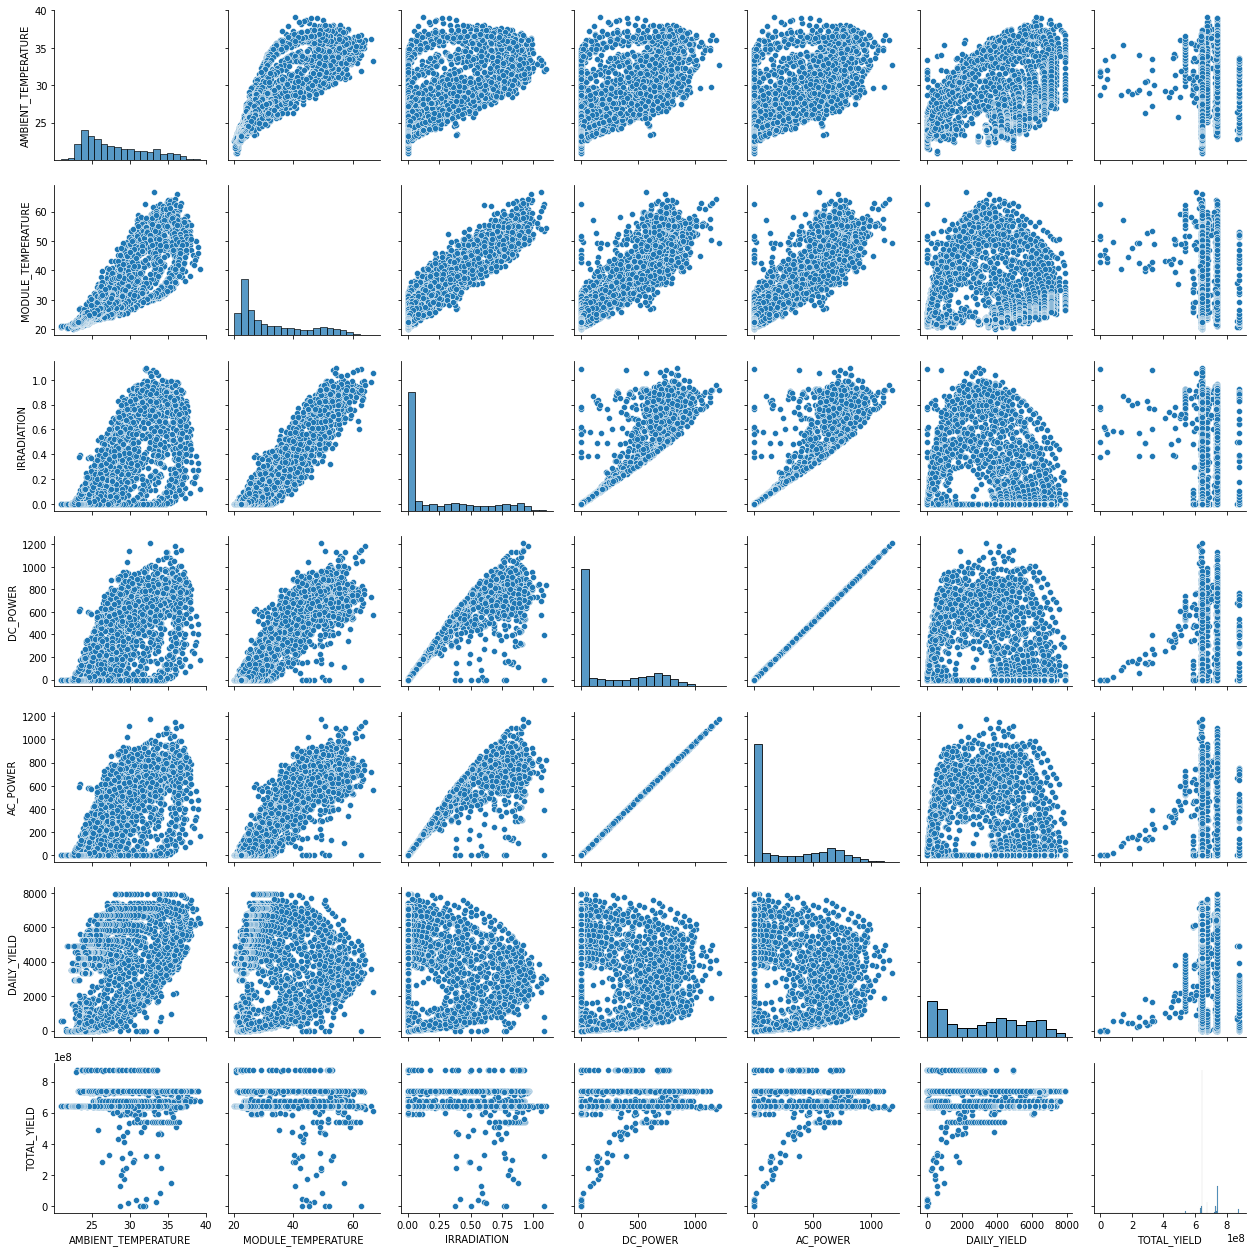

In [40]:
num_columns3 = data3.columns.to_list()[1:]

sns.pairplot(data=data3[num_columns3])
plt.tight_layout()
plt.show()

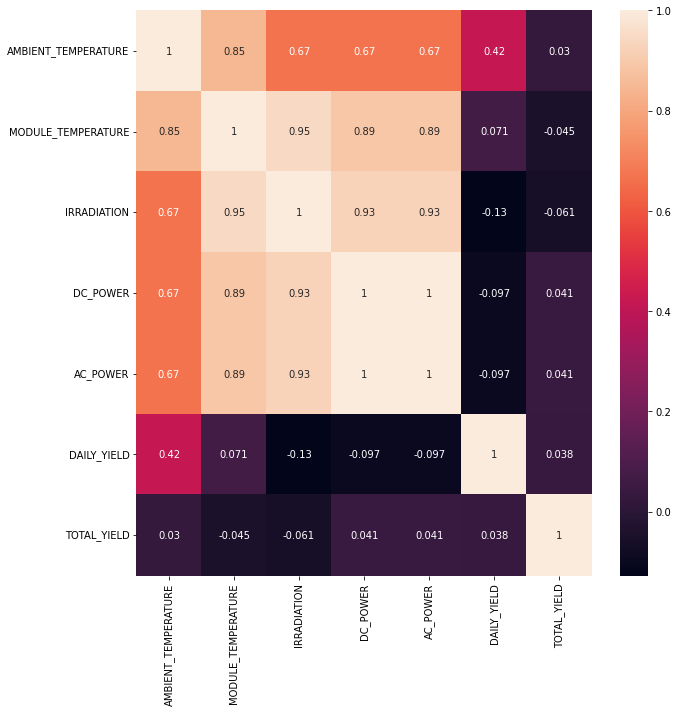

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data3[num_columns3].corr(), annot=True)
plt.tight_layout()
plt.savefig('heatmap2.png')
plt.show()

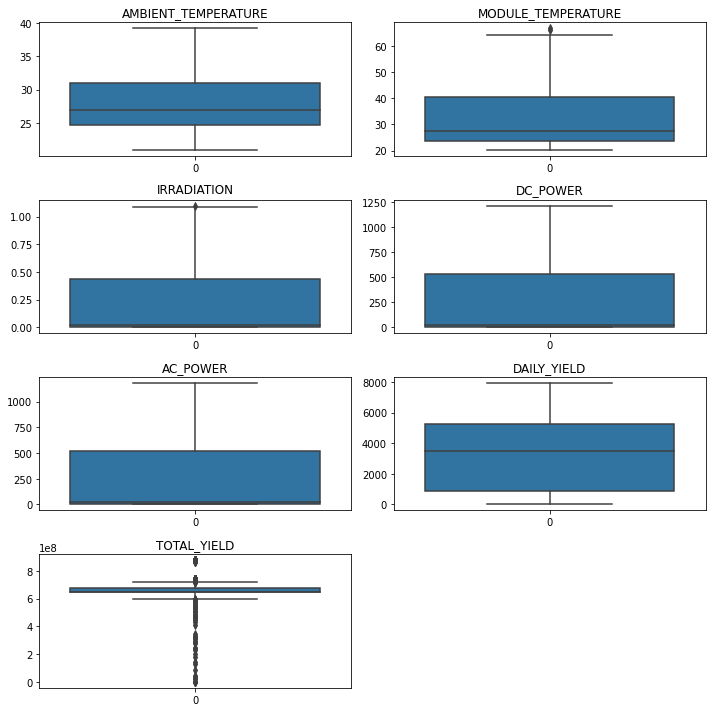

In [95]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns3):
  plt.subplot(4,2,i+1)
  sns.boxplot(data=data3[column])
  plt.title("{}".format(column))

plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

### Drop Uncorrelated Column

Melalui Heatmap, dapat diketahui bahwa data pada kolom TOTAL_YIELD memiliki korelasi yang rendah dengan data pada kolom lain karena mendekati nol. Oleh larena itu, data di kolom ini dapat dibuang.

In [43]:
data4 = data3.drop(['TOTAL_YIELD'], axis = 1)
data4.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            27.004764           25.060789          0.0   
1 2020-05-15 00:15:00            26.880811           24.421869          0.0   
2 2020-05-15 00:30:00            26.682055           24.427290          0.0   
3 2020-05-15 00:45:00            26.500589           24.420678          0.0   
4 2020-05-15 01:00:00            26.596148           25.088210          0.0   

   DC_POWER  AC_POWER  DAILY_YIELD  
0       0.0       0.0  2222.724459  
1       0.0       0.0  1290.954545  
2       0.0       0.0  1290.954545  
3       0.0       0.0  1290.954545  
4       0.0       0.0  1205.272727

### Remove Outliers

Dari boxplot, masih terdapat outliers pada kolom MODULE_TEMPERATURE dan IRRADIATION. Oleh karena itu, untuk membersihkannya, akan digunakan metode IQR.

In [44]:
num_columns4 = data4.columns.to_list()[1:]

Q1 = data4.quantile(0.25)
Q3 = data4.quantile(0.75)
IQR=Q3-Q1
data5 = data4[~((data4[num_columns4]<(Q1-1.5*IQR))|(data4[num_columns4]>(Q3+1.5*IQR))).any(axis=1)]
 
data5.shape

(3256, 7)

### Check New Dataset Part 2

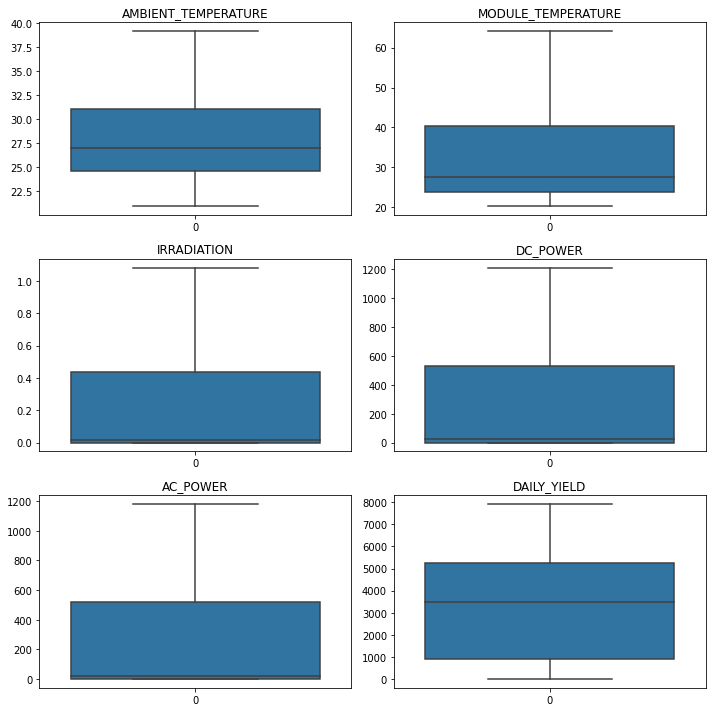

In [45]:
plt.figure(figsize = (10,10))
for i, column in enumerate(num_columns4):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=data5[column])
  plt.title("{}".format(column))

plt.tight_layout()
plt.show()

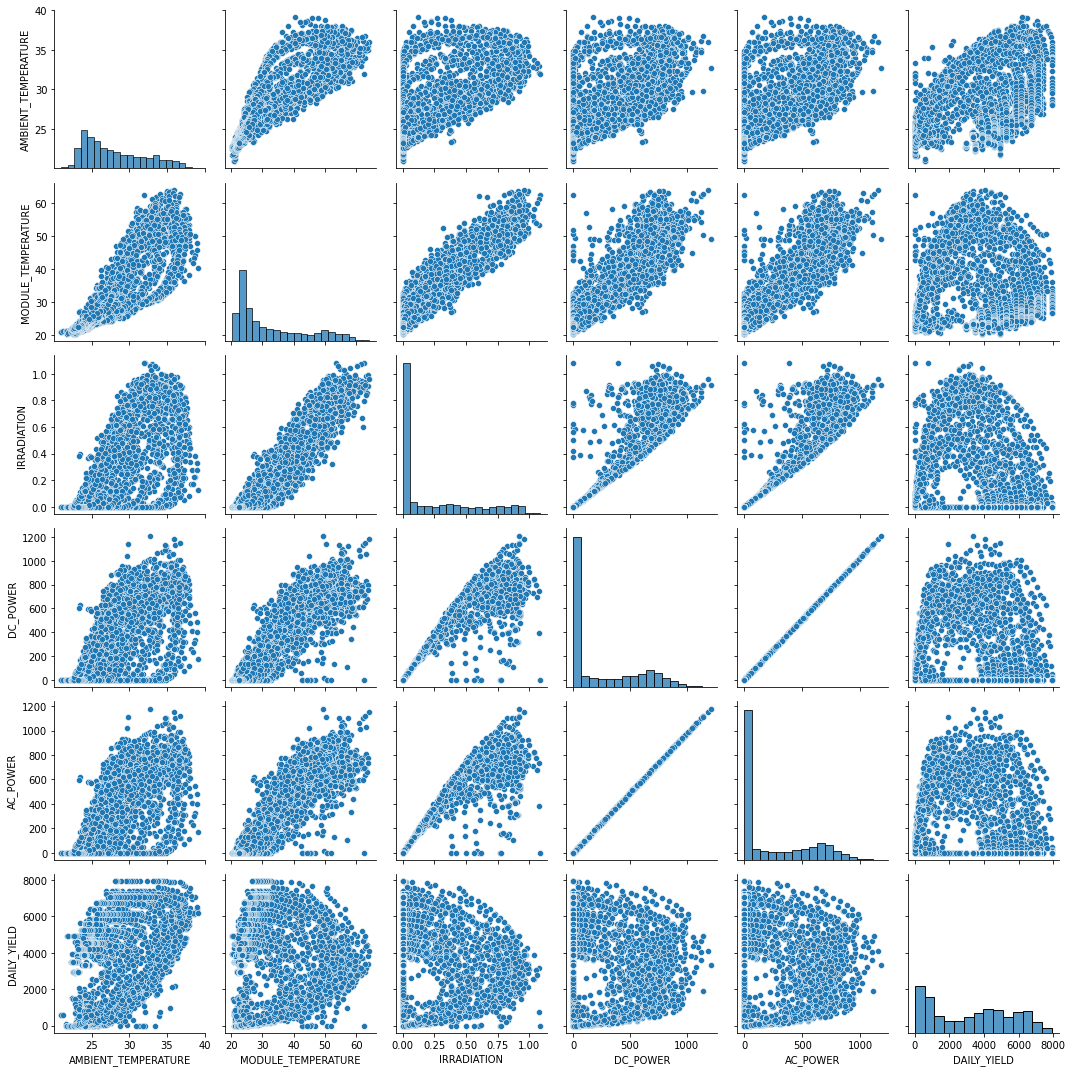

In [96]:
sns.pairplot(data=data5[num_columns4])
plt.tight_layout()
plt.savefig('pairplot2.png')
plt.show()

### Remove Zero Values

Setelah mengecek ulang data, dapat diketahui dari pairplot bahwa kolom AC_POWER, DC_POWER, dan IRRADIATION memiliki nilai nol yang banyak. Oleh karena itu, di sini, data tersebut akan dihilangkan.

In [120]:
data6 = data5.loc[(data5[['AC_POWER','DC_POWER','IRRADIATION']]!=0).all(axis=1)]
 
data6.shape

(1718, 7)

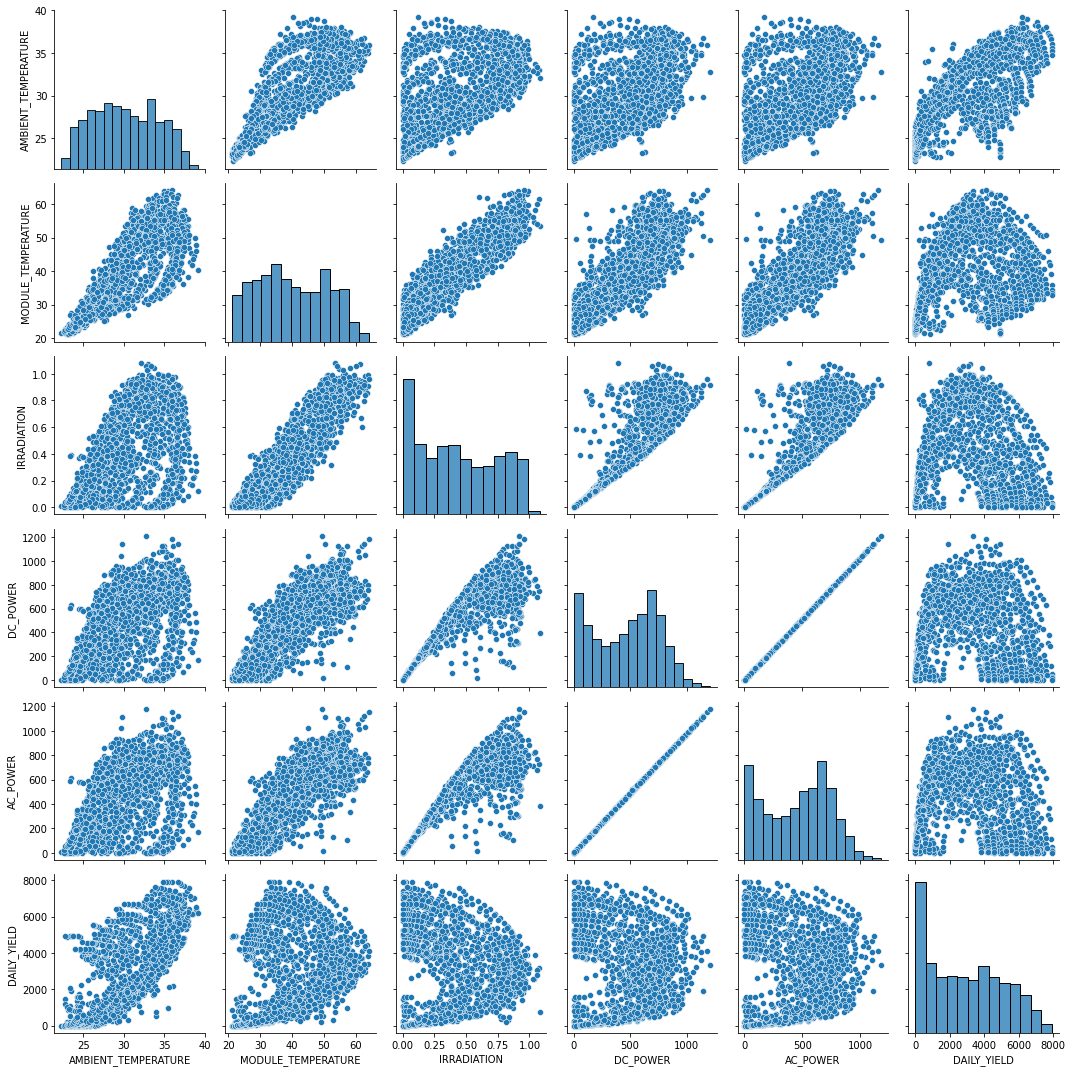

In [121]:
sns.pairplot(data=data6[num_columns4])
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

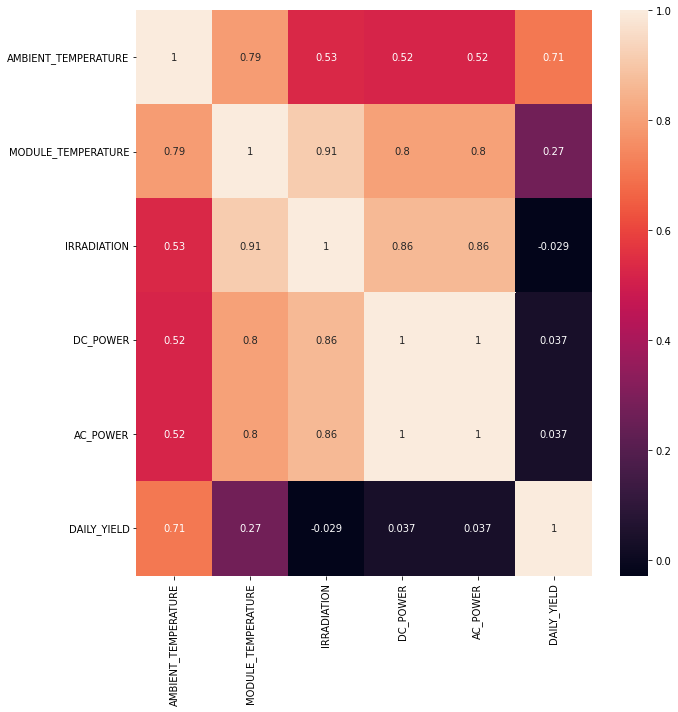

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data6[num_columns4].corr(), annot=True)
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

## Data Preparation

### Principal Component Analysis

Dari pairplot dan heatmap, dapat diketahui bahwa data AC_POWER dan DC_POWER memiliki korelasi yang sangat tinggi. Oleh karena itu, untuk mengurangi dimensi data, akan dilakukan PCA terhadap dua kolom tersebut. Hasilnya adalah sebuah fitur agregat bernama OUTPUT_POWER.

In [122]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2, random_state=42)
pca.fit(data6[["DC_POWER", "AC_POWER"]])
pca.explained_variance_ratio_.round(3)

array([1., 0.])

In [123]:
pca2 = PCA(n_components = 1, random_state=42)
pca2.fit(data6[["DC_POWER", "AC_POWER"]])
data6['OUTPUT_POWER'] = pca2.transform(data6.loc[:, ('DC_POWER','AC_POWER')]).flatten()
data6.drop(['DC_POWER','AC_POWER'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [124]:
data6.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
24 2020-05-15 06:00:00            24.742787           24.077230     0.012962   
25 2020-05-15 06:15:00            24.763911           24.356189     0.021038   
26 2020-05-15 06:30:00            24.786323           24.548886     0.042435   
27 2020-05-15 06:45:00            25.048245           25.746662     0.103496   
28 2020-05-15 07:00:00            25.673202           28.674707     0.199450   

    DAILY_YIELD  OUTPUT_POWER  
24     1.178788   -637.484028  
25     6.438312   -621.355667  
26    15.687662   -577.201691  
27    39.716450   -439.093139  
28    96.987879   -229.432018

### Train-Test Split

Setelah data siap, akan dilakukan pembagian dataset untuk kebutuhan pelatihan dan evaluasi. Di sini, data akan dibagi dengan rasio 80:20. Label atau nilai yang akan diprediksi adalah DAILY_YIELD, yaitu total energi yang dipanen secara harian. Kolom sisanya akan menjadi fitur untuk latihan. Selain itu, data DATE_TIME tidak akan digunakan sehingga dapat dibuang.

In [125]:
from sklearn.model_selection import train_test_split
 
X = data6.drop(["DATE_TIME", "DAILY_YIELD"], axis =1)
y = data6["DAILY_YIELD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [126]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1718
Total # of sample in train dataset: 1374
Total # of sample in test dataset: 344


### Scaling

Fitur data latih memiliki rentang nilai yang berbeda-beda. Hal ini dapat meningkatkan kesalahan dari model sewaktu pelatihan. Oleh karena itu, data latih akan dilakukan Min-Max Scaling untuk mengubah setiap fitur menjadi dalam rentang [0,1]. Data uji akan dilakukan scaling secara terpisah untuk mencegah kebocoran data.

In [127]:
from sklearn.preprocessing import MinMaxScaler
 
num_columns5 = X.columns.to_list()
scaler = MinMaxScaler()
scaler.fit(X_train[num_columns5])
X_train[num_columns5] = scaler.transform(X_train.loc[:, num_columns5])
X_train[num_columns5].head()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  OUTPUT_POWER
1287             0.517295            0.677083     0.790294      0.629740
1504             0.844173            0.478727     0.289762      0.379670
3229             0.320437            0.246691     0.167927      0.231982
2245             0.530978            0.761513     0.742819      0.510665
2644             0.325682            0.309730     0.307928      0.417517

## Model Development

Hal pertama yang dilakukan adalah mempersiapkan DataFrame untuk membandingkan kinerja model.

In [128]:
models = pd.DataFrame(index=['train_r2', 'test_r2'], 
                      columns=['SVM', 'RandomForest', 'AdaBoost', 'GradBoost'])

### Random Forest

Model pertama yang digunakan adalah Random Forest. Model ini adalah model ensmble (gabungan) dari model-model individu (estimator), seperti Decision Tree. Model ini akan menjalankan prediksi secara pararel.

Di sini, parameter yang digunakan untuk model Random Forest adalah jumlah estimator (n_estimators) dan kedalaman pohon maksimal (max_depth). Untuk memperoleh parameter terbaik digunakan metode Grid Search yang menghasilkan parameter:
* n_estimators = 100
* max_depth = 32

Pada model ini dan model selanjutnya juga terdapat parameter random_state yang digunakan untuk mengatur random number generator sehingga model akan selalu memiliki output yang sama.

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
parameters1 = {
    'n_estimators' : [25, 50, 100, 150, 200],
    'max_depth' : [4, 8, 16, 32, 64]
}

rf_grid = GridSearchCV(model1, parameters1, cv = 5)

In [58]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                         'n_estimators': [25, 50, 100, 150, 200]})

In [59]:
rf_grid.best_params_

{'max_depth': 32, 'n_estimators': 100}

In [60]:
rf_grid.best_score_

0.8374238930949656

In [129]:
from sklearn.metrics import r2_score
 
RF = RandomForestRegressor(n_estimators=100, max_depth=32, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_r2','RandomForest'] = r2_score(y_pred=RF.predict(X_train), y_true=y_train)     

### SVM


Model kedua yang digunakan adalah Support Vector Machine (SVM). Tujuan dari model ini adalah mencari hyperplane yang memiliki margin paling besar. 

Pada SVM terdapat beberapa parameter. Pertama, kernel adalah fungsi yang digunakan untuk memetakan data berdimensi rendah ke dimensi yang lebih tiggi. Kedua, gamma adalah koefisien dari kernel. Ketiga, C adalah parameter regularisasi. Dengan Grid Search, diperoleh parameter terbaik:
* kernel = poly
* gamma = 1
* C = 1

In [62]:
from sklearn.svm import SVR

model2 = SVR()
parameters2 = {
    'C' : [0.1, 0.2, 0.5, 1],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : [0.01 , 0.1, 1]
}

svm_grid = GridSearchCV(model2, parameters2, cv = 5)

In [63]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 0.5, 1], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [64]:
svm_grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [65]:
svm_grid.best_score_

0.03387711807878313

In [130]:
svr = SVR(kernel='poly', gamma = 1, C=1)
svr.fit(X_train, y_train)

models.loc['train_r2','SVM'] = r2_score(y_pred=svr.predict(X_train), y_true=y_train) 

### Adaptive Boosting

Adaptive Boosting (AdaBoost) adalah model ensemble seperti Random Forest. Perbedaannya, model dilatih secara sekuensial dengan menggabungkan model-model lemah menjadi model yang lebih kuat.

Di sini, terdapat beberapa perameter yang digunakan. Pertama, n_estimators adalah jumlah model individu yang digabungkan. Kedua, learning_rate yaitu bobot yang dikenakan ke regressor tiap iterasi. Ketiga, loss yaitu fungsi loss yang digunakan untuk mengubah bobot tiap iterasi. Di sini, dengan Grid Search diperoleh parameter terbaik:
* learning_rate = 0.1
* n_estimators = 25
* loss = linear

In [67]:
from sklearn.ensemble import AdaBoostRegressor

model3 = AdaBoostRegressor()
parameters3 = {
    'n_estimators' : [25, 50, 100, 150, 200],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
    'loss' : ['linear', 'square', 'exponential']
}

adaboost_grid = GridSearchCV(model3, parameters3, cv = 5)

In [68]:
adaboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [25, 50, 100, 150, 200]})

In [69]:
adaboost_grid.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 25}

In [70]:
adaboost_grid.best_score_

0.7512723772636137

In [131]:
adaboosting = AdaBoostRegressor(learning_rate=0.1, loss='linear', n_estimators = 25, random_state=42)                             
adaboosting.fit(X_train, y_train)
models.loc['train_r2','AdaBoost'] = r2_score(y_pred=adaboosting.predict(X_train), y_true=y_train)

### Gradient Boosting

Gradient Boosting (GradBoost) adalah varian algoritma Boosting seperti AdaBoost. Perbedaannya, GradBoost merupakan algoritma yang lebih umum sehingga lebih fleksibel untuk diapliaksikan ke setiap kasus.

Pada kasus ini, parameter yang digunakan adalah:
* n_estimators, yaitu jumlah model individu
* learning_rate, yaitu ukuran mengecilnya kontribusi estimator tiap iterasi
* loss, fungsi loss yang dioptimisasi
* subsample, ukuran potongan sampel yang digunakan untuk melatih model individu,
* criterion, fungsi untuk mebgukur kualitasi pemisahan (*split*)

Dengan Grid Search, diperoleh parameter terbaik:
* n_estimators = 150,
* learning_rate = 0.1,
* loss = squared_error,
* subsample = 0.5,
* criterion = friedman_mse

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

model4 = GradientBoostingRegressor()
parameters4 = {
    'n_estimators' : [25, 50, 100, 150, 200],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'subsample' : [0.1, 0.5, 1],
    'criterion' : ['friedman_mse', 'squared_error', 'mse']
}

gradboost_grid = GridSearchCV(model4, parameters4, cv = 5)

In [89]:
gradboost_grid.fit(X_train, y_train)

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [25, 50, 100, 150, 200],
                         'subsample': [0.1, 0.5, 1]})

In [90]:
gradboost_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'n_estimators': 150,
 'subsample': 0.5}

In [91]:
gradboost_grid.best_score_

0.8328308711051997

In [132]:
gradboosting = GradientBoostingRegressor(learning_rate=0.1, loss='squared_error', n_estimators = 150, random_state=42, subsample = 0.5, criterion = 'friedman_mse')                             
gradboosting.fit(X_train, y_train)
models.loc['train_r2','GradBoost'] = r2_score(y_pred=gradboosting.predict(X_train), y_true=y_train)

### Training Comparison

Dari nilai R<sup>2</sup> proses latih, dapat diketahui bahwa model Random Forest memiliki skor tertinggi sehingga layak dipilih menjadi solusi. Di sini, Random Forest memiliki R<sup>2</sup> = 0,97.

In [133]:
models

SVM RandomForest  AdaBoost GradBoost
train_r2  0.046665     0.977213  0.776718  0.914772
test_r2        NaN          NaN       NaN       NaN

## Evaluation

Sebelum melakukan evaluasi, data uji akan dikenakan scaling terlebih dahulu.

In [134]:
X_test.loc[:, X_test.columns.to_list()] = scaler.transform(X_test[X_test.columns.to_list()])

In [135]:
model_dict = {
    'SVM': svr, 
    'RandomForest': RF, 
    'AdaBoost': adaboosting, 
    'GradBoost': gradboosting
}

for name, model in model_dict.items():
  models.loc['test_r2', name] = r2_score(y_true=y_test, y_pred=model.predict(X_test))

models

SVM RandomForest  AdaBoost GradBoost
train_r2  0.046665     0.977213  0.776718  0.914772
test_r2   0.067179     0.810899  0.729985  0.795988

In [136]:
models = models.T

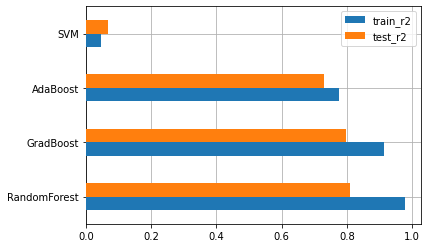

In [137]:
fig, ax = plt.subplots()
models.sort_values(by='test_r2', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.savefig('Model_Comparison.png')

In [146]:
idx = np.random.choice(list(range(345)))

prediction = pd.DataFrame(X_test.iloc[idx, :]).T.copy()
pred_dict = {'y_true' : y_test.iloc[idx]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediction).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_SVM  prediksi_RandomForest  prediksi_AdaBoost  \
0  5769.633333        2213.6                 5503.1             4373.9   

   prediksi_GradBoost  
0              5654.0

Seperti telah disebutkan sebelumnya, metrik yang digunakan untuk mengukur kinerja model prediksi adalah nilai **R<sup>2</sup>**. Nilai ini diperoleh dengan mengikuti persamaan:

$$ R^2 = 1 - {SSE \over SST} $$  <br>
$$ SSE = \sum (y_{true} - y_{pred})^2 $$ <br>
$$ SST = \sum (y_{true} - \bar{y}_{true})^2 $$ <br>

Dari nilai R<sup>2</sup>, model dapat dibagi menjadi tiga:
1.   Model yang akurat, yaitu apabila nilai R<sup>2</sup> mendekati 1.0
2.   Model biasa, yaitu apabila nilai R<sup>2</sup> di sekitar 0.0
3.   Model buruk, yaitu yaitu nilai R<sup>2</sup> kurang dari 0.0

Dari proses latih dan evaluasi, dapat diketahui bahwa model Random Forest memiliki nilai R<sup>2</sup> yang mendekati satu sehingga dapat dikatakan sebagai model prediksi yang akurat. Random Forest memiliki nilai R<sup>2</sup> latih dan uji masing-masing sebesar 0,97 dan 0,81. Dengan begitu, model ini dapat dipilih untuk melakukan prediksi energi yang dihasilkan PLTS dalam kurun waktu tertentu.

Untuk membuktikan bahwa model Random Forest dapat memenuhi tujuan proyek, dilakukan prediksi terhadap data acak pada data uji. Di sini, untuk nilai energi 5769,63 kWh, model Random Forest memprediksi dengan angka 5503,1 kWh. Nilai prediksi yang tidak terlalu jauh dari nilai sesungguhnya.